In [1]:
import yfinance as yf
import requests
from requests.adapters import HTTPAdapter
from urllib3.poolmanager import PoolManager
import ssl

class SSLAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        context = ssl.create_default_context()
        context.check_hostname = False
        context.verify_mode = ssl.CERT_NONE
        kwargs['ssl_context'] = context
        return super(SSLAdapter, self).init_poolmanager(*args, **kwargs)

session = requests.Session()
session.mount('https://', SSLAdapter())

# Now pass this session to yfinance
company = "COALINDIA.NS"
company = yf.Ticker(company, session=session)
company = company.history(period='max')

In [4]:
import pandas as pd
import pandas_ta as ta
import numpy as np

# Calculate technical indicators for each company
company['RSI_14'] = ta.rsi(company['Close'], length=14)
company['EMA_21'] = ta.ema(company['Close'], length=21)
company['EMA_50'] = ta.ema(company['Close'], length=50)
company['SMA_21'] = ta.sma(company['Close'], length=21)
company['SMA_50'] = ta.sma(company['Close'], length=50)
company['SMA_200'] = ta.sma(company['Close'], length=200)


# add some more features
company['Range'] = company['High'] - company['Low']


# Shift the closing price to get the target variable
company['Target1'] = company['Close'].shift(-5)
company['Target2'] = company['Close'].shift(-10)
company['Target3'] = company['Close'].shift(-15)
company['Target4'] = company['Close'].shift(-20)
company.dropna(inplace=True)

In [5]:
company.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_14,EMA_21,EMA_50,SMA_21,SMA_50,SMA_200,Range,Target1,Target2,Target3,Target4
Date,,,,,,,,,,,,,,,,,,
2024-07-25 00:00:00+05:30,486.135708,498.561364,479.205057,489.105988,10281157,0.0,0.0,53.422718,485.745116,476.387669,484.315828,479.558528,404.679698,19.356308,535.046326,518.264221,512.299988,538.849976
2024-07-26 00:00:00+05:30,493.313895,506.630659,493.313895,504.798981,20437968,0.0,0.0,61.429790,487.477285,477.501838,486.253582,480.769412,405.845712,13.316764,519.303833,524.551331,522.000000,538.099976
2024-07-29 00:00:00+05:30,509.402897,510.591021,502.472245,507.076202,7259754,0.0,0.0,62.438862,489.259005,478.661617,488.379926,481.646635,406.999715,8.118775,501.779175,518.759277,524.599976,531.400024
2024-07-30 00:00:00+05:30,507.076212,520.392916,504.897995,514.204834,13197520,0.0,0.0,65.483160,491.526808,480.055469,490.558130,482.657520,408.204803,15.494921,494.650513,516.581055,532.200012,526.349976
2024-07-31 00:00:00+05:30,518.264228,520.194921,505.442510,517.026611,11972565,0.0,0.0,66.635894,493.844972,481.505318,492.792912,483.686226,409.442483,14.752411,526.234497,499.700012,528.849976,527.549988
2024-08-01 00:00:00+05:30,529.699799,536.877974,522.769147,535.046326,34763894,0.0,0.0,72.867473,497.590549,483.604965,495.683042,484.671369,410.763711,14.108826,518.264221,512.299988,538.849976,524.950012
2024-08-02 00:00:00+05:30,528.709717,531.878028,517.125616,519.303833,10985150,0.0,0.0,61.976729,499.564484,485.004921,497.547716,485.122851,412.013480,14.752411,524.551331,522.000000,538.099976,520.849976
2024-08-05 00:00:00+05:30,509.897950,509.897950,492.620814,501.779175,11835031,0.0,0.0,52.559266,499.765820,485.662735,498.361007,485.310969,413.175626,17.277137,518.759277,524.599976,531.400024,519.599976
2024-08-06 00:00:00+05:30,503.066304,512.076157,493.066358,494.650513,7142269,0.0,0.0,49.278992,499.300792,486.015196,498.742900,485.283246,414.229830,19.009799,516.581055,532.200012,526.349976,503.649994


In [8]:
company = company[company.index> '2018-01-01']

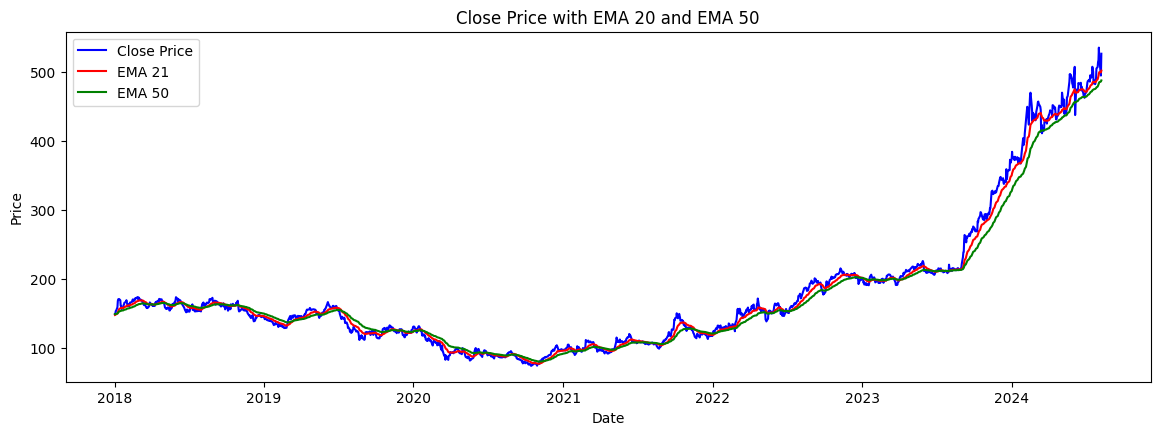

In [9]:
import matplotlib.pyplot as plt
# Set up the plotting area
plt.figure(figsize=(14, 10))

# Plotting the Close Price, EMA20, and EMA50 on the same plot
plt.subplot(2, 1, 1)
plt.plot(company.index, company['Close'], label='Close Price', color='blue')
plt.plot(company.index, company['EMA_21'], label='EMA 21', color='red')
plt.plot(company.index, company['EMA_50'], label='EMA 50', color='green')

plt.title("Close Price with EMA 20 and EMA 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [10]:
# Features and target
features = ['RSI_14', 'EMA_21', 'EMA_50', 'SMA_21', 'SMA_50', 'SMA_200', 'Volume', 'Range', 'Close']
X = company[features]
y = company['Target1']
y2 = company['Target2']
y3 = company['Target3']
y4 = company['Target4']


In [12]:
# Define the cutoff date
cutoff_date = '2024-03-30'
# Split the DataFrame into training and testing sets based on the cutoff date
train_data = company[company.index < cutoff_date]
test_data = company[company.index >= cutoff_date]
# Display the shapes to verify
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (1540, 18)
Testing Data Shape: (87, 18)


In [13]:
X_train = train_data[features]
X_test = test_data[features]
y_train = train_data['Target1']
y_test = test_data['Target1']
# Display the shapes to verify
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", y_train.shape)

Training Data Shape: (1540, 9)
Testing Data Shape: (1540,)


In [10]:
# Splitting the data into training and testing sets
# Determine the split point (70% of the data for training)
split_point = int(len(company) * 0.7)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y1_train, y1_test = y1.iloc[:split_point], y1.iloc[split_point:]
y2_train, y2_test = y2.iloc[:split_point], y2.iloc[split_point:]
y3_train, y3_test = y3.iloc[:split_point], y3.iloc[split_point:]
y4_train, y4_test = y4.iloc[:split_point], y4.iloc[split_point:]

In [14]:
# Train the Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 52.602123570935476
Root Mean Squared Error (RMSE): 59.66917830852486


In [16]:
# Predict the next week's closing price using the last available data point from the training set
latest_data = X.iloc[-1:].copy()

predicted_price = model.predict(latest_data)

print(f"Predicted closing price for the next week: {predicted_price[0]}")


Predicted closing price for the next week: 421.68461547851564


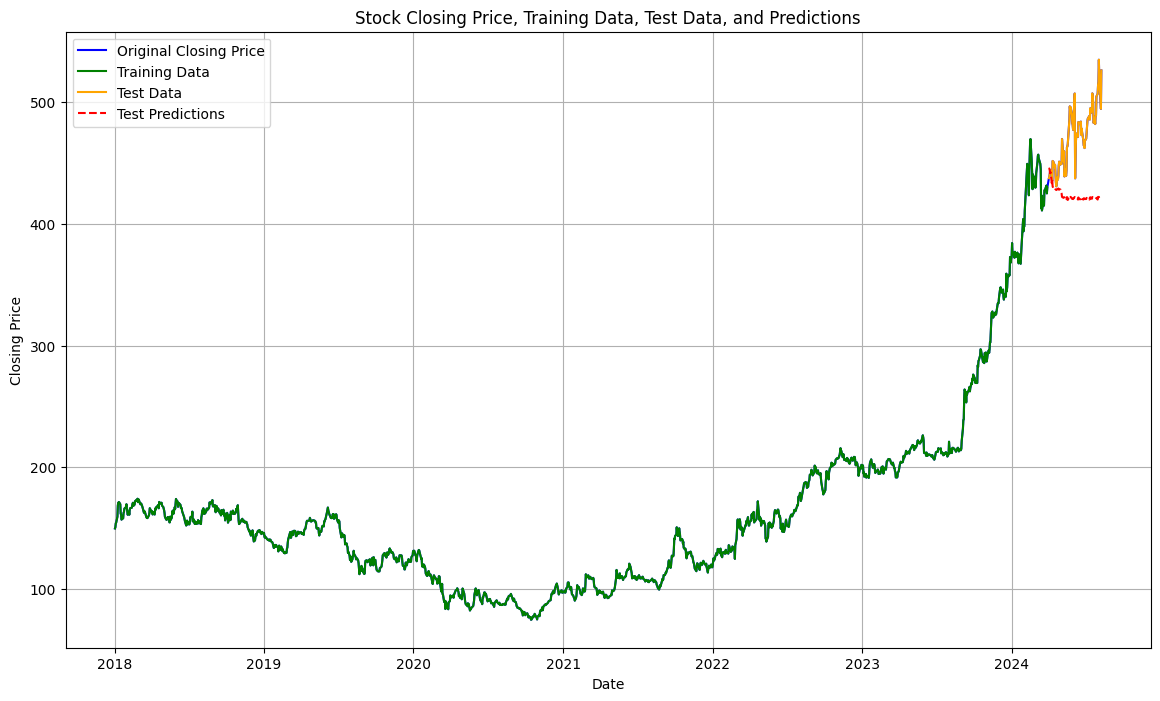

In [19]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot the original closing price data
plt.plot(company.index, company['Close'], label='Original Closing Price', color='blue')

# Plot the training data
plt.plot(train_data.index, train_data['Close'], label='Training Data', color='green')

# Plot the test data
plt.plot(test_data.index, test_data['Close'], label='Test Data', color='orange')

# Plot the test predictions
plt.plot(test_data.index, y_pred, label='Test Predictions', color='red', linestyle='--')

# Adding title and labels
plt.title('Stock Closing Price, Training Data, Test Data, and Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [18]:
y_pred

array([445.2474881 , 445.63377808, 444.07268799, 441.75033691,
       442.56329071, 433.57621643, 436.71018158, 431.02812622,
       429.04892853, 429.73130249, 429.037742  , 428.22451416,
       427.9684436 , 428.72011261, 428.80377533, 429.20952332,
       428.29595978, 428.32140961, 428.41348724, 426.25032379,
       424.98360016, 422.252435  , 421.6306543 , 421.78807587,
       421.99599701, 421.92966034, 420.38164551, 421.2138205 ,
       420.41233887, 422.11332428, 421.84649323, 419.79056274,
       422.20887054, 422.46876831, 421.46431763, 422.29946198,
       421.00342712, 420.60837952, 420.79996277, 420.47818115,
       420.99055664, 422.20887054, 421.92966309, 421.7519397 ,
       422.43114258, 421.88609436, 420.81431824, 420.10194641,
       421.84055176, 421.06085144, 420.43362732, 420.43362732,
       421.77371857, 422.12025238, 420.81431824, 420.11333252,
       421.11382233, 420.47570709, 420.88709229, 420.57273499,
       420.56134888, 421.4757019 , 420.43362732, 420.35